In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [40]:
import dataset as data

# stimulus_presentation_id

df = data.get_spike_info(stimulus_name='static_gratings')


In [41]:
df.columns

Index(['stimulus_condition_id', 'spike_count', 'stimulus_presentation_count',
       'spike_mean', 'spike_std', 'spike_sem', 'structure_acronym',
       'stimulus_presentation_id', 'stimulus_block', 'start_time', 'stop_time',
       'contrast', 'size', 'stimulus_name', 'temporal_frequency',
       'spatial_frequency', 'phase', 'color', 'y_position', 'frame',
       'x_position', 'orientation', 'duration'],
      dtype='object')

In [42]:
df.head()

,stimulus_condition_id,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,structure_acronym,stimulus_presentation_id,stimulus_block,start_time,...,stimulus_name,temporal_frequency,spatial_frequency,phase,color,y_position,frame,x_position,orientation,duration
unit_id,,,,,,,,,,,,,,,,,,,,,
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49434,8.0,5398.833208,...,static_gratings,null,0.04,0.25,null,null,null,null,0.0,0.250209
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49496,8.0,5414.346145,...,static_gratings,null,0.04,0.25,null,null,null,null,0.0,0.250196
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49523,8.0,5421.101799,...,static_gratings,null,0.04,0.25,null,null,null,null,0.0,0.250211
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49651,8.0,5453.128549,...,static_gratings,null,0.04,0.25,null,null,null,null,0.0,0.250211
951805352,4787,70,49,1.428571,1.859659,0.265666,grey,49772,8.0,5483.403835,...,static_gratings,null,0.04,0.25,null,null,null,null,0.0,0.250214


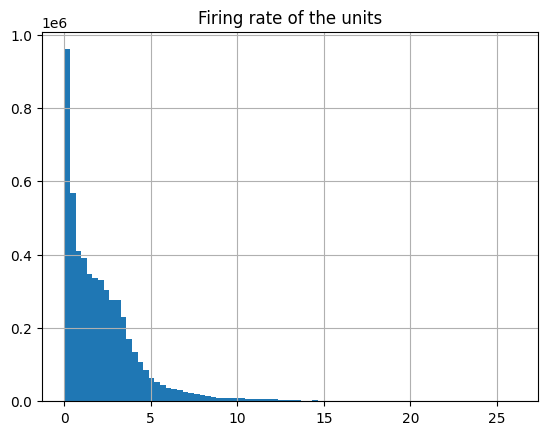

In [43]:
df['spike_mean'].hist(bins=80)
plt.title("Firing rate of the units")
plt.show()

In [44]:
import matplotlib.pyplot as plt

df_unit = df.groupby(level='unit_id')
units_df = pd.DataFrame(df.index.get_level_values('unit_id').unique(), columns=['unit_id'])

units_df['mean'] = units_df['unit_id'].apply(lambda x: df_unit.get_group(x)['spike_mean'].mean())
units_df['std'] = units_df['unit_id'].apply(lambda x: df_unit.get_group(x)['spike_mean'].std())

units_df['region'] = units_df['unit_id'].apply(lambda x: df_unit.get_group(x)['structure_acronym'].unique()[0])

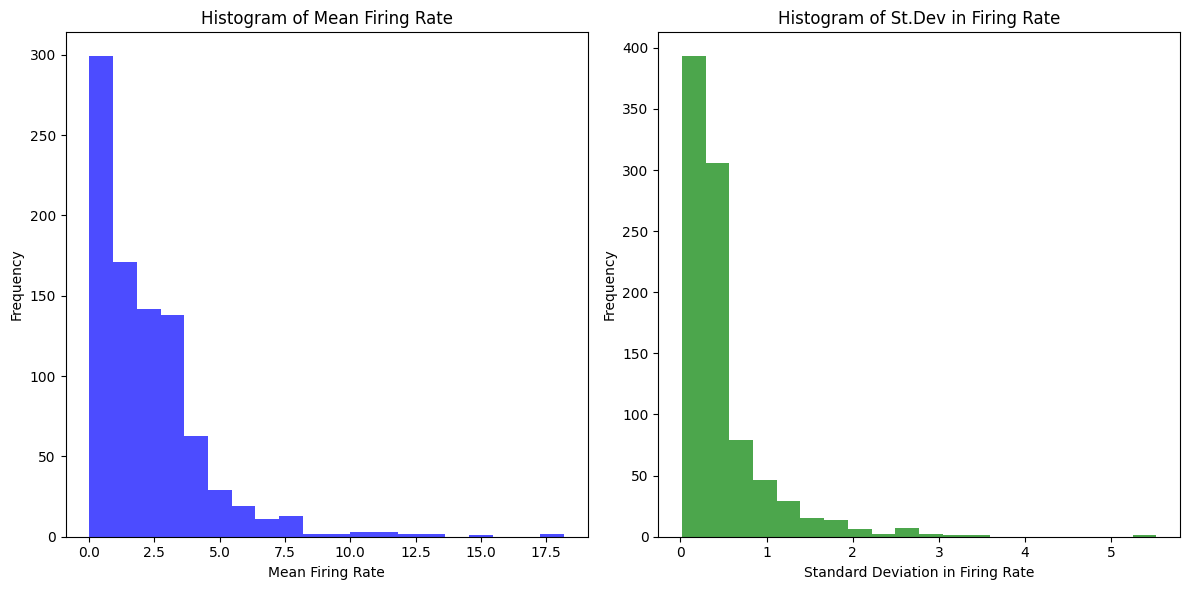

In [45]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'mean'
axes[0].hist(units_df['mean'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Mean Firing Rate')
axes[0].set_xlabel('Mean Firing Rate')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'var'
axes[1].hist(units_df['std'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Histogram of St.Dev in Firing Rate')
axes[1].set_xlabel('Standard Deviation in Firing Rate')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

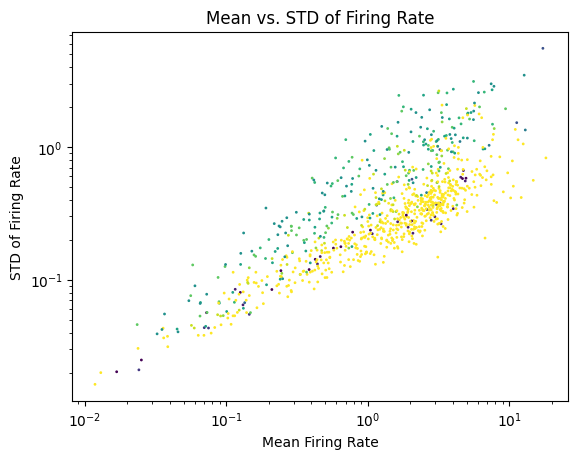

In [61]:
plt.scatter(units_df['mean'], units_df['std'], s=1, c=units_df['region'].astype('category').cat.codes)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean Firing Rate')
plt.ylabel('STD of Firing Rate')
plt.title('Mean vs. STD of Firing Rate')

plt.show()

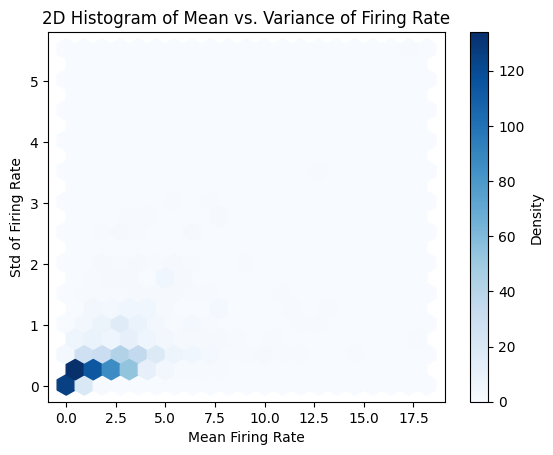

In [47]:
# Create 2D histogram (hexbin plot) for 'mean' vs. 'var'
plt.hexbin(units_df['mean'], units_df['std'], gridsize=20, cmap='Blues')

# Add color bar to indicate density
plt.colorbar(label='Density')

# Set labels and title
plt.xlabel('Mean Firing Rate')
plt.ylabel('Std of Firing Rate')

plt.title('2D Histogram of Mean vs. Variance of Firing Rate')

# Display the plot
plt.show()

In [48]:
df.columns

Index(['stimulus_condition_id', 'spike_count', 'stimulus_presentation_count',
       'spike_mean', 'spike_std', 'spike_sem', 'structure_acronym',
       'stimulus_presentation_id', 'stimulus_block', 'start_time', 'stop_time',
       'contrast', 'size', 'stimulus_name', 'temporal_frequency',
       'spatial_frequency', 'phase', 'color', 'y_position', 'frame',
       'x_position', 'orientation', 'duration'],
      dtype='object')

In [49]:
print(f'There are {df.index.get_level_values("unit_id").nunique()} unique units in total')

There are 902 unique units in total


In [50]:
df.columns

Index(['stimulus_condition_id', 'spike_count', 'stimulus_presentation_count',
       'spike_mean', 'spike_std', 'spike_sem', 'structure_acronym',
       'stimulus_presentation_id', 'stimulus_block', 'start_time', 'stop_time',
       'contrast', 'size', 'stimulus_name', 'temporal_frequency',
       'spatial_frequency', 'phase', 'color', 'y_position', 'frame',
       'x_position', 'orientation', 'duration'],
      dtype='object')

In [51]:
# each stimulus usually covers

stimulus_groups = df.groupby('stimulus_presentation_id')
unique_unit_counts = stimulus_groups['unit_id'].nunique()


KeyError: 'Column not found: unit_id'

In [ ]:
df.columns

In [ ]:
unique_unit_counts.hist(bins=30, color='skyblue', edgecolor='black')

plt.title('Number of Activated Neurons, as a Function of Stimulus ID')
plt.xlabel('Number of Unique Neurons')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# correlation matrix between neurons



In [ ]:
# compute higher moments